In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/Reddit experiences 1000 - Sheet1.csv')
df

,Title,Content
0,My 32 year old wife died of the virus in early...,We both tested positive in early April. I was ...
1,Flattening the Curve - No Counter Measures vs....,NaN
2,I'm awake and slowly (SLOWLY) improving after ...,25 year old trans woman who'd been on hormone ...
3,Need a plasma donor from a recovered COVID-19 ...,My cousin’s husband has been on a ventilator f...
4,My wife died,"My wife died, after we took every precaution. ..."
...,...,...
992,I have omicron and I'm scared,My stupid fucking dad gave my omicron after la...
993,"Tested positive for Covid, even though vaccina...",Mostly a rant. Last Thursdays came down with f...
994,I cannot stress enough the importance of water…,It took me just over two weeks to get over a n...
995,Extremely unhealthy and covid positive,As the title says I'm an extremely unhealthy i...


In [ ]:
from bs4 import BeautifulSoup
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from dateutil import parser
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#Functions for NLP


def lowercase(input):
  """
  Returns lowercase text
  """
  return input.lower()

def remove_punctuation(input):
  """
  Returns text without punctuation
  """
  return input.translate(str.maketrans('','', string.punctuation))

def remove_whitespaces(input):
  """
  Returns text without extra whitespaces
  """
  return " ".join(input.split())

def remove_html_tags(input):
  """
  Returns text without HTML tags
  """
  soup = BeautifulSoup(input, "html.parser")
  stripped_input = soup.get_text(separator=" ")
  return stripped_input

def tokenize(input):
  """
  Returns tokenized version of text
  """
  return word_tokenize(input)

def remove_stop_words(input):
  """
  Returns text without stop words
  """
  input = word_tokenize(input)
  return [word for word in input if word not in stopwords.words('english')]

def lemmatize(input):
  """
  Lemmatizes input using NLTK's WordNetLemmatizer
  """
  lemmatizer=WordNetLemmatizer()
  input_str=word_tokenize(input)
  new_words = []
  for word in input_str:
    new_words.append(lemmatizer.lemmatize(word))
  return ' '.join(new_words)


def stemming(text):
    snowball = SnowballStemmer(language='english')
    list=[]
    for token in word_tokenize(text):
        list.append(snowball.stem(token))
    return ' '.join(list)

def nlp_pipeline(input):
  """
  Function that calls all other functions together to perform NLP on a given text
  """
  return stemming(lemmatize(' '.join(remove_stop_words(remove_whitespaces(remove_punctuation(remove_html_tags(lowercase(input))))))))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df_final = df.drop(columns='Title')
df_final

,Content
0,We both tested positive in early April. I was ...
1,NaN
2,25 year old trans woman who'd been on hormone ...
3,My cousin’s husband has been on a ventilator f...
4,"My wife died, after we took every precaution. ..."
...,...
992,My stupid fucking dad gave my omicron after la...
993,Mostly a rant. Last Thursdays came down with f...
994,It took me just over two weeks to get over a n...
995,As the title says I'm an extremely unhealthy i...


In [ ]:
df_final = df_final.dropna()

for index, row in df_final.iterrows():
    nlp_pipeline(row['Content'])

In [ ]:
df_final['preprocessed_review'] = df_final['Content'].apply(lambda x: nlp_pipeline(x))
df_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Content,preprocessed_review
0,We both tested positive in early April. I was ...,test posit earli april pretti sick week recov ...
2,25 year old trans woman who'd been on hormone ...,25 year old tran woman whod hormon replac ther...
3,My cousin’s husband has been on a ventilator f...,cousin ’ husband ventil 10 day seek plasma don...
4,"My wife died, after we took every precaution. ...",wife die took everi precaut im lost wear mask ...
6,"62 years old, sleep apnea, overweight. Western...",62 year old sleep apnea overweight western ny ...


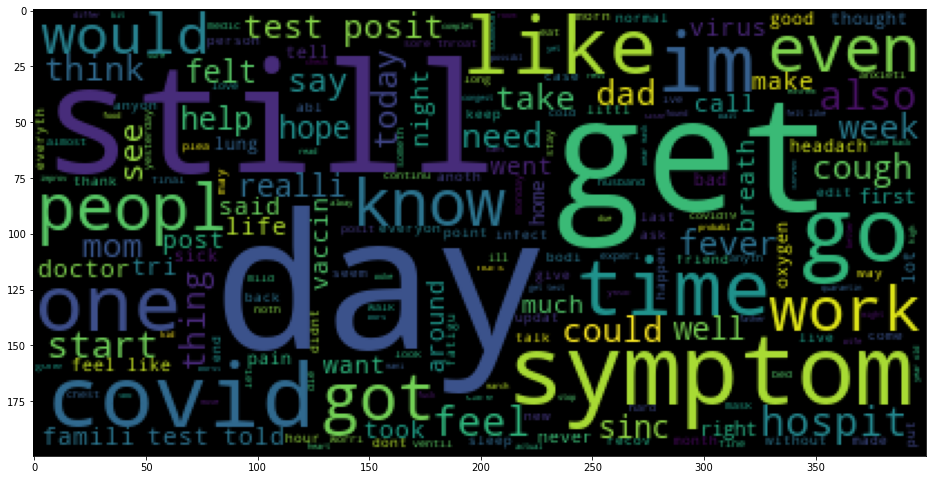

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

words_list = df_final['preprocessed_review'].unique().tolist()
words = " ".join(words_list)

wordcloud =  WordCloud(stopwords=stop_words).generate(words)

plt.figure(figsize=(16, 16))
plt.imshow(wordcloud)
plt.show()

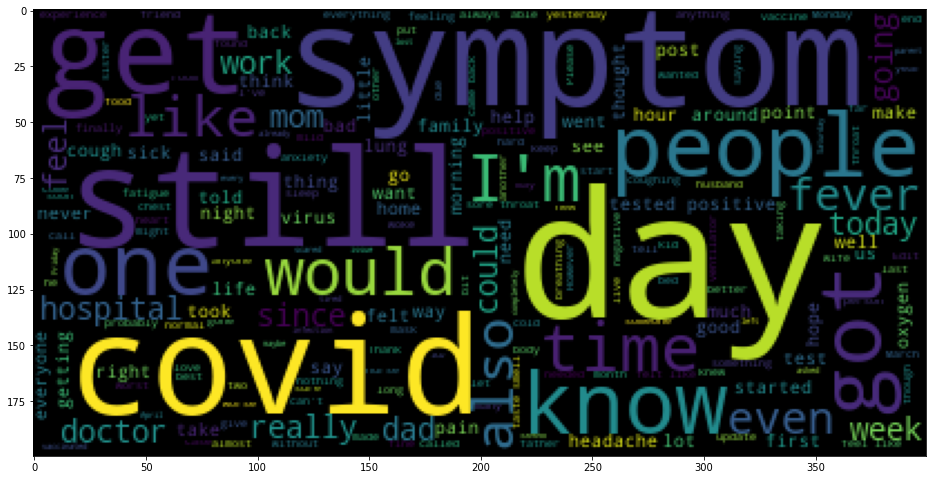

In [ ]:
words_list = df_final['Content'].unique().tolist()
words = " ".join(words_list)

wordcloud =  WordCloud(stopwords=stop_words).generate(words)

plt.figure(figsize=(16, 16))
plt.imshow(wordcloud)
plt.show()

In [ ]:
!pip install spacy
!pip install scispacy
!pip install <Model URL>

     |████████████████████████████████| 44 kB 1.6 MB/s 
     |████████████████████████████████| 6.0 MB 8.8 MB/s 
     |████████████████████████████████| 71 kB 7.6 MB/s 
     |████████████████████████████████| 13.5 MB 29.0 MB/s 
     |████████████████████████████████| 188 kB 63.8 MB/s 
     |████████████████████████████████| 451 kB 63.1 MB/s 
     |████████████████████████████████| 181 kB 69.2 MB/s 
     |████████████████████████████████| 653 kB 46.5 MB/s 
     |████████████████████████████████| 10.1 MB 40.2 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Su

In [ ]:
df_final

,Content,preprocessed_review
0,We both tested positive in early April. I was ...,test posit earli april pretti sick week recov ...
2,25 year old trans woman who'd been on hormone ...,25 year old tran woman whod hormon replac ther...
3,My cousin’s husband has been on a ventilator f...,cousin ’ husband ventil 10 day seek plasma don...
4,"My wife died, after we took every precaution. ...",wife die took everi precaut im lost wear mask ...
6,"62 years old, sleep apnea, overweight. Western...",62 year old sleep apnea overweight western ny ...
...,...,...
992,My stupid fucking dad gave my omicron after la...,stupid fuck dad gave omicron laugh covid entir...
993,Mostly a rant. Last Thursdays came down with f...,most rant last thursday came flu like symptom ...
994,It took me just over two weeks to get over a n...,took two week get nasti bout covid felt like l...
995,As the title says I'm an extremely unhealthy i...,titl say im extrem unhealthi individu 480 lb h...


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_bionlp13cg_md-0.5.0.tar.gz

     |████████████████████████████████| 120.2 MB 28 kB/s 
  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.5.0-py3-none-any.whl size=120239502 sha256=e19c1ef12eb6c3e573271e4181f51dd8a18aa20021e78169f2ca6dff704c5c3f
  Stored in directory: /root/.cache/pip/wheels/9d/69/01/c0a45e3fd3dfe3eec4fd1ae7d62a76e1909dba9f64f92f2428
Successfully built en-ner-bionlp13cg-md


In [ ]:
nerm2 = spacy.load("en_ner_bionlp13cg_md")

In [ ]:
bner = {}

for i in df_final.index:
  bner[i] = nerm2(df_final['preprocessed_review'][i])

In [ ]:
print(list(bner[0].sents))

[test posit earli april pretti sick week recov realli bad respiratori issu spent 22 day hospit final lose fight kid lost mom lost soulmat took antibodi test last week posit im take half day work tomorrow donat plasma say help peopl recov want help id love think help famili avoid go]


In [ ]:
print(list(bner[0].ents))

[kid, plasma, id love]


In [ ]:
for i in df_final.index:
  print(list(bner[i].ents))

[kid, plasma, id love]
[tran, d hormon, lung, kidney]
[plasma, abl, abl, blood type, plasma, plasma, physic, mobil, oxygen, readi leav hospit]
[]
[uncl, oxygen, lung, liver, lung, quarantin, alon alon, induc coma alon hospit, alon, uncl]
[]
[heart, gift stranger]
[]
[]
[]
[albuterol, head base skull, quarantin, breath heavi, lung, blood, heart, oxygen, quarantin, entri, stomach, heart, lung, someon, stomach, heart, abl, eye, lung]
[relat, tube, organ, cdc guidelin]
[submiss, abl]
[chang, heart]
[continu, “]
[organ, kidney, testicular, blood clot, organ, brain clot, blood, blood clot, organ, ill fine]
[tri, editupd]
[21, quarantin, pcp, pcp, abl, stomach, oxygen, blood, breath tube]
[oxygen, kidney, lung, lung, brain, lung]
[physic]
[cit, line, stick like sore, head pay, lung, eye, man, eye, fiver]
[]
[tri, tri]
[oxygen]
[]
[relat u, uncl, cancer, uncl]
[tri]
[easili, head tabl ’]
[larg, quarantin, abl, continu, continu receiv]
[oxygen, oxygen, oxygen]
[oxygen, uncl, uncl, lung, uncl, k

In [ ]:
ner = {}

for i in df_final.index:
  ner[i] = nerm2(df_final['Content'][i])

In [ ]:
print(list(ner[0].sents))

[We both tested positive in early April. I was pretty sick for a week but recovered., She had really bad respiratory issues and spent 22 days in the hospital before finally losing the fight., Our kids lost their mom and I lost my soulmate., 

I took an antibody test last week and am positive so I'm taking a half day at work tomorrow to donate plasma., They say it helps people recover from this and I want to help. I'd love to think I helped some family avoid what we're going through.]


In [ ]:
print(list(ner[0].ents))

[plasma, people]


In [ ]:
for i in df_final.index:
  print(list(ner[i].ents))

[plasma, people]
[trans, lungs, kidney]
[plasma, dr, blood, plasma, OH, plasma, oxygen]
[]
[oxygen, lungs, blood, kidney, liver, lungs, coma, human]
[]
[[34,, COVID antibody, vaccine, heart juice]
[taste]
[]
[]
[albuterol, sore throat, Sore, sinuses..., head, Throat, skull, nose, lung, blood, heart, oxygen, stomach, Heart, lungs, stomach, heart, taste, nose, eye, skull, lung]
[endotracheal tube, organs, people]
[https://redd.it/fv67m1 I, tube]
[people, heart]
[Feel, Coronavirus. I]
[people, people, organ, kidneys, chest, testicular, blood clots, taste/smell, organs, brain, blood, blood clots, organs, people, Im 27, people]
[people, children, Covid-19, gift, people, people, people]
[body, PCP, PCP, stomach, oxygen, blood gases, tube]
[NC oxygen delivery, kidneys, lungs, lungs, brain, lungs]
[muscle]
[Cit N, line, Ohh fuck,, head, line, man, lungs, hive-mind, eyes, man, man, eyes crinkled, I’m, fiver]
[]
[love]
[Christmas, oxygen]
[]
[cancer, COVID-19, people]
[people, I, I’m, people]
[h

In [ ]:
a = []
for i in df_final.index:
  a.append(list(ner[i].ents))

In [ ]:
print(a)

[[plasma, people], [trans, lungs, kidney], [plasma, dr, blood, plasma, OH, plasma, oxygen], [], [oxygen, lungs, blood, kidney, liver, lungs, coma, human], [], [[34,, COVID antibody, vaccine, heart juice], [taste], [], [], [albuterol, sore throat, Sore, sinuses..., head, Throat, skull, nose, lung, blood, heart, oxygen, stomach, Heart, lungs, stomach, heart, taste, nose, eye, skull, lung], [endotracheal tube, organs, people], [https://redd.it/fv67m1 I, tube], [people, heart], [Feel, Coronavirus. I], [people, people, organ, kidneys, chest, testicular, blood clots, taste/smell, organs, brain, blood, blood clots, organs, people, Im 27, people], [people, children, Covid-19, gift, people, people, people], [body, PCP, PCP, stomach, oxygen, blood gases, tube], [NC oxygen delivery, kidneys, lungs, lungs, brain, lungs], [muscle], [Cit N, line, Ohh fuck,, head, line, man, lungs, hive-mind, eyes, man, man, eyes crinkled, I’m, fiver], [], [love], [Christmas, oxygen], [], [cancer, COVID-19, people], 

In [ ]:
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

for list in a:
  for number in list:
    words_list = number.unique().tolist()
words = " ".join(words_list)
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stop_words).generate(text)
# Plot
plot_cloud(wordcloud)